# Distinguish Your Own Digits (DYOD)

You are going to write a classifier that distinguishes between the number 3 and number 8.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

From the command line run `pip install mnist`. This is a library that will help you bring down the mnist dataset. If you run this from a notebook, you need to put  `!pip install mnist` in a cell by itself.

In [3]:
!pip install mnist

You should consider upgrading via the '/opt/hostedtoolcache/Python/3.6.15/x64/bin/python -m pip install --upgrade pip' command.


## Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


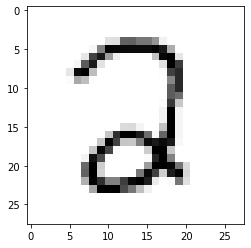

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

In [15]:
#Impoting functions from 'Kudzu'
from kudzu.model import Model
from kudzu.train import Learner
from kudzu.optim import GD
from kudzu.data import Data, Sampler,Dataloader

from kudzu.callbacks import AccCallback
from kudzu.callbacks import ClfCallback

from kudzu.loss import MSE

from kudzu.layer import Sigmoid,Relu
from kudzu.layer import Affine

### Let us create a `Config` class, to store important parameters. 
This class essentially plays the role of a dictionary.

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

### Running Models with the Training data
Details about the network layers:
- A first affine layer has 784 inputs and does 100 affine transforms. These are followed by a Relu
- A second affine layer has 100 inputs from the 100 activations of the past layer, and does 100 affine transforms. These are followed by a Relu
- A third affine layer has 100 activations and does 2 affine transformations to create an embedding for visualization. There is no non-linearity here.
- A final "logistic regression" which has an affine transform from 2 inputs to 1 output, which is squeezed through a sigmoid.


In [17]:
data = Data(X_train, y_train.reshape(-1,1))
sampler = Sampler(data, config.bs, shuffle=True)

dl = Dataloader(data, sampler)

opt = GD(config.lr)
loss = MSE()

In [18]:
training_data_x = X_train
testing_data_x = X_test
training_data_y = y_train.reshape(-1,1)
testing_data_y = y_test.reshape(-1,1)

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("last", 2, 1), Sigmoid("last")]
model_nn = Model(layers)
model_lr = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

xavier
xavier
xavier
xavier
xavier


In [20]:
nn_learner = Learner(loss, model_nn, opt, config.num_epochs)
acc_nn = ClfCallback(nn_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
nn_learner.set_callbacks([acc_nn])

In [21]:
lr_learner = Learner(loss, model_lr, opt, config.num_epochs)
acc_lr = ClfCallback(lr_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
lr_learner.set_callbacks([acc_lr])

In [22]:
nn_learner.train_loop(dl)

Epoch 0, Loss 0.2459
Training Accuracy: 0.6868, Testing Accuracy: 0.7127



Epoch 10, Loss 0.0708
Training Accuracy: 0.9294, Testing Accuracy: 0.9385



Epoch 20, Loss 0.0465
Training Accuracy: 0.9506, Testing Accuracy: 0.9587



Epoch 30, Loss 0.0377
Training Accuracy: 0.9585, Testing Accuracy: 0.9642



Epoch 40, Loss 0.0329
Training Accuracy: 0.9629, Testing Accuracy: 0.9688



Epoch 50, Loss 0.0299
Training Accuracy: 0.9664, Testing Accuracy: 0.9718



Epoch 60, Loss 0.0276
Training Accuracy: 0.9685, Testing Accuracy: 0.9713



Epoch 70, Loss 0.0259
Training Accuracy: 0.9711, Testing Accuracy: 0.9723



Epoch 80, Loss 0.0245
Training Accuracy: 0.9721, Testing Accuracy: 0.9728



Epoch 90, Loss 0.0233
Training Accuracy: 0.9739, Testing Accuracy: 0.9728



Epoch 100, Loss 0.0223
Training Accuracy: 0.9748, Testing Accuracy: 0.9728



Epoch 110, Loss 0.0215
Training Accuracy: 0.9761, Testing Accuracy: 0.9728



Epoch 120, Loss 0.0207
Training Accuracy: 0.9773, Testing Accuracy: 0.9743



Epoch 130, Loss 0.02
Training Accuracy: 0.9783, Testing Accuracy: 0.9738



Epoch 140, Loss 0.0193
Training Accuracy: 0.9790, Testing Accuracy: 0.9738



Epoch 150, Loss 0.0187
Training Accuracy: 0.9796, Testing Accuracy: 0.9743



Epoch 160, Loss 0.0181
Training Accuracy: 0.9800, Testing Accuracy: 0.9743



Epoch 170, Loss 0.0176
Training Accuracy: 0.9808, Testing Accuracy: 0.9753



Epoch 180, Loss 0.017
Training Accuracy: 0.9816, Testing Accuracy: 0.9763



Epoch 190, Loss 0.0165
Training Accuracy: 0.9820, Testing Accuracy: 0.9768



Epoch 200, Loss 0.0161
Training Accuracy: 0.9827, Testing Accuracy: 0.9768



Epoch 210, Loss 0.0156
Training Accuracy: 0.9831, Testing Accuracy: 0.9768



Epoch 220, Loss 0.0151
Training Accuracy: 0.9840, Testing Accuracy: 0.9778



Epoch 230, Loss 0.0147
Training Accuracy: 0.9843, Testing Accuracy: 0.9778



Epoch 240, Loss 0.0143
Training Accuracy: 0.9848, Testing Accuracy: 0.9793



0.0035953086824726506

In [23]:
lr_learner.train_loop(dl)

Epoch 0, Loss 0.2633
Training Accuracy: 0.5834, Testing Accuracy: 0.5554



Epoch 10, Loss 0.1011
Training Accuracy: 0.9203, Testing Accuracy: 0.9340



Epoch 20, Loss 0.0776
Training Accuracy: 0.9325, Testing Accuracy: 0.9461



Epoch 30, Loss 0.067
Training Accuracy: 0.9409, Testing Accuracy: 0.9521



Epoch 40, Loss 0.0607
Training Accuracy: 0.9453, Testing Accuracy: 0.9561



Epoch 50, Loss 0.0563
Training Accuracy: 0.9476, Testing Accuracy: 0.9567



Epoch 60, Loss 0.0532
Training Accuracy: 0.9497, Testing Accuracy: 0.9587



Epoch 70, Loss 0.0507
Training Accuracy: 0.9521, Testing Accuracy: 0.9592



Epoch 80, Loss 0.0487
Training Accuracy: 0.9536, Testing Accuracy: 0.9612



Epoch 90, Loss 0.0471
Training Accuracy: 0.9546, Testing Accuracy: 0.9622



Epoch 100, Loss 0.0457
Training Accuracy: 0.9552, Testing Accuracy: 0.9632



Epoch 110, Loss 0.0446
Training Accuracy: 0.9560, Testing Accuracy: 0.9627



Epoch 120, Loss 0.0435
Training Accuracy: 0.9566, Testing Accuracy: 0.9627



Epoch 130, Loss 0.0426
Training Accuracy: 0.9574, Testing Accuracy: 0.9642



Epoch 140, Loss 0.0418
Training Accuracy: 0.9579, Testing Accuracy: 0.9657



Epoch 150, Loss 0.0411
Training Accuracy: 0.9580, Testing Accuracy: 0.9657



Epoch 160, Loss 0.0404
Training Accuracy: 0.9584, Testing Accuracy: 0.9657



Epoch 170, Loss 0.0398
Training Accuracy: 0.9587, Testing Accuracy: 0.9662



Epoch 180, Loss 0.0393
Training Accuracy: 0.9591, Testing Accuracy: 0.9662



Epoch 190, Loss 0.0388
Training Accuracy: 0.9595, Testing Accuracy: 0.9667



Epoch 200, Loss 0.0383
Training Accuracy: 0.9599, Testing Accuracy: 0.9672



Epoch 210, Loss 0.0379
Training Accuracy: 0.9604, Testing Accuracy: 0.9672



Epoch 220, Loss 0.0375
Training Accuracy: 0.9609, Testing Accuracy: 0.9672



Epoch 230, Loss 0.0371
Training Accuracy: 0.9609, Testing Accuracy: 0.9677



Epoch 240, Loss 0.0368
Training Accuracy: 0.9614, Testing Accuracy: 0.9682



0.02417297278775281

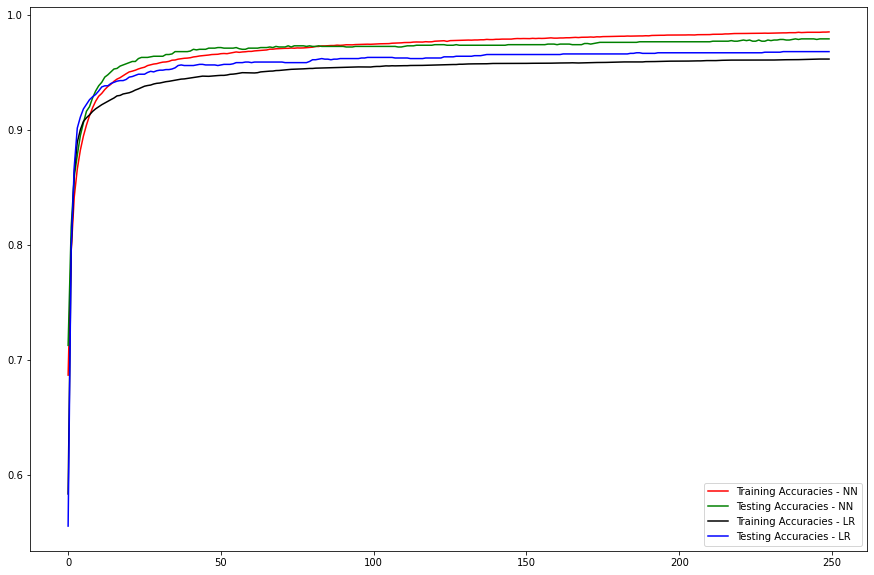

In [24]:
#comparing the results of NN and LR
plt.figure(figsize=(15,10))

# Neural Network plots
plt.plot(acc_nn.accuracies, 'r-', label = "Training Accuracies - NN")
plt.plot(acc_nn.test_accuracies, 'g-', label = "Testing Accuracies - NN")

# Logistic Regression plots
plt.plot(acc_lr.accuracies, 'k-', label = "Training Accuracies - LR")
plt.plot(acc_lr.test_accuracies, 'b-', label = "Testing Accuracies - LR")
plt.legend()

#### Plotting the outputs of this layer of the NN.


In [25]:
new_model = Model(layers[:-2])
testing_plot = new_model(testing_data_x)

Text(0.5, 1.0, 'Outputs')

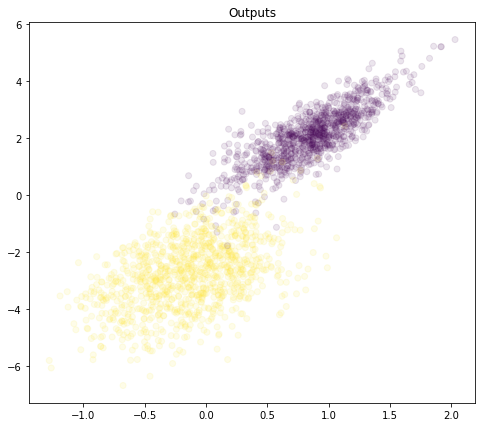

In [26]:
# Plotting the scatter plot of points and color coding by class
plt.figure(figsize=(8,7))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel());
plt.title('Outputs')

Probability contours

In [27]:
model_prob = Model(layers[-2:]) 

In [28]:
#creating the x and y ranges according to the above generated plot.
x_range = np.linspace(-4, 1, 100) 
y_range = np.linspace(-6, 6, 100) 
x_grid, y_grid = np.meshgrid(x_range, y_range) # x_grid and y_grig are of size 100 X 100

# converting x_grid and y_grid to continuous arrays
x_gridflat = np.ravel(x_grid)
y_gridflat = np.ravel(y_grid)

# The last layer of the current model takes two columns as input. Hence transpose of np.vstack() is required.
X = np.vstack((x_gridflat, y_gridflat)).T

prob_contour = model_prob(X).reshape(100,100) 

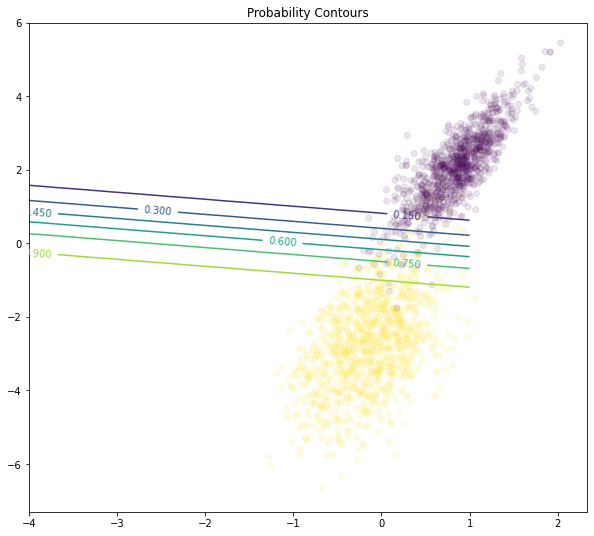

In [29]:
plt.figure(figsize=(10,9))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(x_grid,y_grid,prob_contour)
plt.title('Probability Contours')
plt.clabel(contours, inline = True );